# Preliminaries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

> A Top-down Runnable Jupyter Notebook containing exactly the same contents as this notebook can be found [here](https://matplotlib.org/matplotblog/posts/an-inquiry-into-matplotlib-figures/)

# A word before we get started...
---
Although a beginner can follow along with this guide, it is primarily meant for people who have at least a basic knowledge of how Matplotlib's plotting functionality works.

Essentially, if you know how to take 2 `numpy` arrays and plot them (using an appropriate type of graph) on 2 different axes in a single figure and give it basic styling, you're good to go for the purposes of this guide.

If you feel you need some introduction to basic matplotlib plotting, here's a great guide that can help you get a feel for introductory plotting using Matplotlib : https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

From here on, I will be assuming that you have gained sufficient knowledge to follow along this guide.

Also, in order to save everyone's time, I will keep my explanations short, terse and very much to the point, and sometimes leave it for the reader to interpret things (because that's what I've done throughtout this guide for myself anyway).

The primary driver in this whole exercise will be code and not text, and I encourage you to spin up a Jupyter notebook and type in and try out everything yourself to make the best use of this resource.

## What this guide *is* and what it is *not*:
This is not a guide about how to beautifully plot different kinds of data using matplotlib, the internet is more than full of such tutorials by people who can explain it way better than I can. 

This article attempts to explain the workings of some of the foundations of any plot you create using matplotlib.
We will mostly refrain from focusing on what data we are plotting and instead focus on the anatomy of our plots.

# Setting up

Matplotlib has many styles available, we can see the available options using:

In [2]:
plt.style.available

['seaborn-whitegrid',
 'classic',
 'seaborn-talk',
 'seaborn-poster',
 'fast',
 'seaborn-deep',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-bright',
 'grayscale',
 'seaborn-ticks',
 'seaborn',
 '_classic_test',
 'seaborn-colorblind',
 'ggplot',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-paper',
 'tableau-colorblind10',
 'Solarize_Light2',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-muted',
 'bmh']

We shall use `seaborn`. This is done like so:

In [3]:
plt.style.use('seaborn')

Let's get started!

In [4]:
# Creating some fake data for plotting
xs = np.linspace(0, 2 * np.pi, 400)
ys = np.sin(xs ** 2)

xc = np.linspace(0, 2 * np.pi, 600)
yc = np.cos(xc ** 2)

# Exploration

The usual way to create a plot using matplotlib goes somewhat like this:

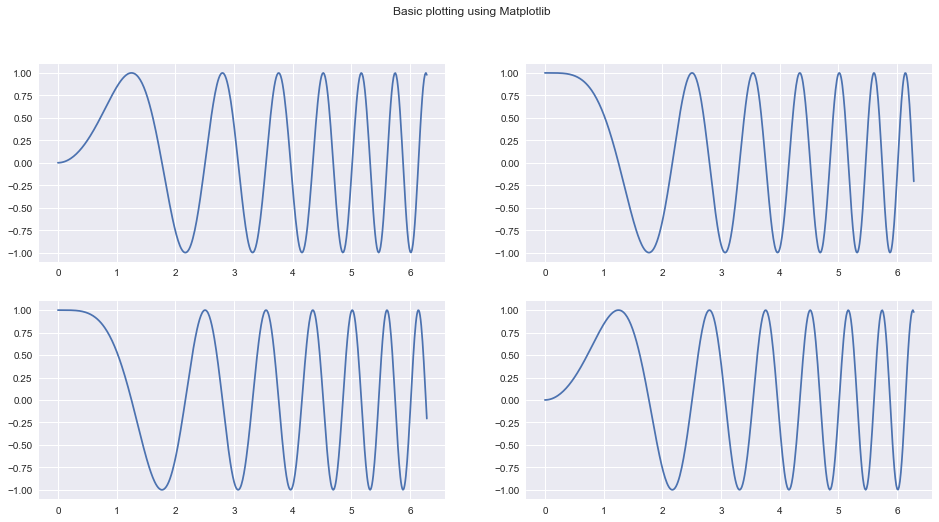

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
# `Fig` is short for Figure. `ax` is short for Axes.
ax[0, 0].plot(xs, ys)
ax[1, 1].plot(xs, ys)
ax[0, 1].plot(xc, yc)
ax[1, 0].plot(xc, yc)
fig.suptitle("Basic plotting using Matplotlib")
plt.show()

Our goal today is to take apart the previous snippet of code and understand all of the underlying building blocks well enough so that we can use them separately and in a much more powerful way.

If  you're a beginner like I was before writing this guide, let me assure you: this is all very simple stuff.

Going into [`plt.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots) documentation (hit `Shift+Tab+Tab` in a Jupyter notebook) reveals some of the other matplotlib internals that it uses in order to give us the `Figure` and it's `Axes`. 

These include :<br>
1. `plt.subplot`
3. `plt.figure`
3. `mpl.figure.Figure`
4. `mpl.figure.Figure.add_subplot`
5. `mpl.gridspec.GridSpec`
6. `mpl.axes.Axes`

Let's try and figure out what these functions / classes do.

# What is a `Figure`? And what are `Axes`?

A [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) in matplotlib is simply your main (imaginary) canvas. This is where you will be doing all your plotting / drawing / putting images and what not. This is the central object with which you will always be interacting. A figure has a size defined for it at the time of creation.

You can define a figure like so (both statements are equivalent):
```python
fig = mpl.figure.Figure(figsize=(10,10))
# OR
fig = plt.figure(figsize=(10,10))
```

Notice the word *imaginary* above. What this means is that a Figure by itself does not have any place for you to plot. You need to attach/add an [`Axes`](https://matplotlib.org/api/axes_api.html?highlight=matplotlib.axes.axes#matplotlib.axes.Axes) to it to do any kind of plotting. You can put as many `Axes` objects as you want inside of any `Figure` you have created.

An `Axes`:
1. Has a space (like a blank Page) where you can draw/plot data.
2. A parent `Figure`
3. Has properties stating where it will be placed inside it's parent `Figure`.
4. Has methods to draw/plot different kinds of data in different ways and add custom styles.

You can create an `Axes` like so (both statements are equivalent):
```python
ax1 = mpl.axes.Axes(fig=fig, rect=[0,0,0.8,0.8], facecolor='red')
#OR
ax1 = plt.Axes(fig=fig, rect=[0,0,0.8,0.8], facecolor='red')
#
```
The first parameter `fig` is simply a pointer to the parent `Figure` to which an Axes will belong.<br>
The second parameter `rect` has four numbers : `[left_position, bottom_position, height, width]` to define the position of the `Axes` inside the `Figure` and the height and width *with respect to the `Figure`*. All these numbers are expressed in percentages.

A `Figure` simply holds a given number of `Axes` at any point of time

We will go into some of these design decisions in a few moments'

# Recreating `plt.subplots` with basic matplotlib functionality
We will try and recreate the below plot using Matplotlib primitives as a way to understand them better. We'll try and be a slightly creative by deviating a bit though.

Text(0.5,0.98,'2x2 Grid')

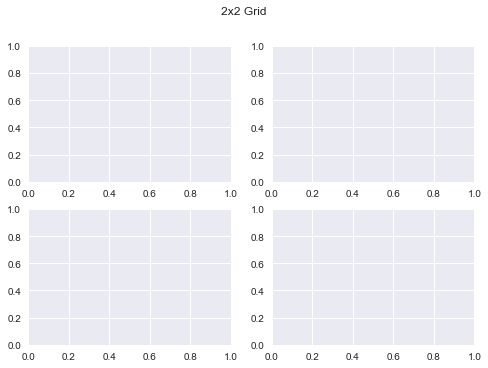

In [6]:
fig, ax = plt.subplots(2,2)
fig.suptitle("2x2 Grid")

# Let's create our first plot using matplotlib primitives:

In [32]:
# We first need a figure, an imaginary canvas to put things on
fig = plt.Figure(figsize=(6,6))
# Let's start with two Axes with an arbitrary position and size
ax1 = plt.Axes(fig=fig, rect=[0.3, 0.3, 0.4, 0.4], facecolor='red')
ax2 = plt.Axes(fig=fig, rect=[0, 0, 1, 1], facecolor='blue')

Now you need to add the `Axes` to `fig`. You should stop right here and think about why would there be a need to do this when `fig` is already a parent of `ax1` and `ax2`? Let's do this anyway and we'll go into the details afterwards.

In [33]:
fig.add_axes(ax2)
fig.add_axes(ax1)

In [35]:
# As you can see the Axes are exactly where we specified.


That means you can do this now:
> Remark: Notice the `ax.reverse()` call in the snippet below. If I hadn't done that, the biggest plot would be placed in the end on top of every other plot and you would just see a single, blank 'cyan' colored plot.

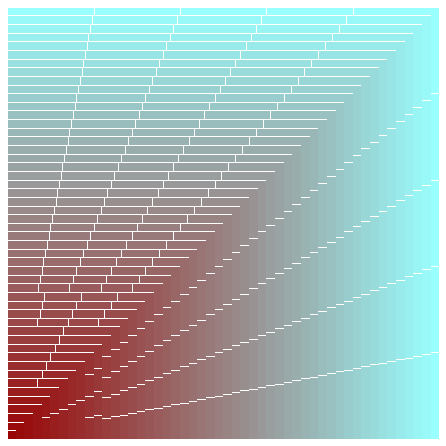

In [10]:
fig = plt.figure(figsize=(6,6))
ax = []
sizes = np.linspace(0.02, 1, 50)
for i in range(50):
    color = str(hex(int(sizes[i] * 255)))[2:]
    if len(color) == 1: color = '0' + color
    color = '#99' + 2 * color
    ax.append(plt.Axes(fig=fig, rect=[0,0, sizes[i], sizes[i]], facecolor=color))
    ax[-1].tick_params(labelbottom=False, labelleft=False)

ax.reverse()
for axes in ax:
    fig.add_axes(axes)
plt.show()

The above example demonstrates why it is important to decouple the process of creation of an `Axes` and actually putting it onto a `Figure`.

Also, you can remove an `Axes` from the canvas area of a `Figure` like so:
```python
fig.delaxes(ax)
```
This can be useful when you want to compare the same primary data (GDP) to several secondary data sources (education, spending, etc.) one by one (you'll need to add and delete each graph from the Figure in succession)<br>
I also encourage you to look into the documentation for `Figure` and `Axes` and glance over the several methods available to them. This will help you know what parts of the wheel you do not need to rebuild when you're working with these objects the next time.

## Recreating our subplots literally from scratch
This should now make sense. We can now create our original `plt.subplots(2, 2)` example using the knowledge we have thus gained so far.<br>
(Although, this is definitely not the most convenient way to do this)

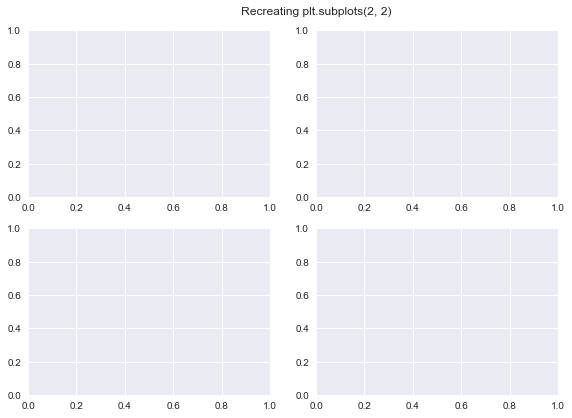

In [11]:
fig = mpl.figure.Figure()
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
canvas = FigureCanvas(fig)

fig.suptitle("Recreating plt.subplots(2, 2)")

ax1 = mpl.axes.Axes(fig=fig, rect=[0,0,0.42,0.42])
ax2 = mpl.axes.Axes(fig=fig, rect=[0, 0.5, 0.42, 0.42])
ax3 = mpl.axes.Axes(fig=fig, rect=[0.5,0,0.42,0.42])
ax4 = mpl.axes.Axes(fig=fig, rect=[0.5, 0.5, 0.42, 0.42])

fig.add_axes(ax1)
fig.add_axes(ax2)
fig.add_axes(ax3)
fig.add_axes(ax4)

fig


## Using gridspec.GridSpec
Docs : https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec

`GridSpec` objects allow us more intuitive control over how our plot is exactly divided into subplots and what the size of each `Axes` is.<br>
You can essentially decide a **Grid** which all your `Axes` will conform to when laying themselves over.<br>
Once you define a grid, or `GridSpec` so to say, you can use that object to *generate* new `Axes` conforming to the grid which you can then add to your `Figure`

Lets see how all of this works in code:

You can define a `GridSpec` object like so (both statements are equivalent):
```python
gs = mpl.gridspec.GridSpec(nrows, ncols, width_ratios, height_ratios)
# OR
gs = plt.GridSpec(nrows, ncols, width_ratios, height_ratios)
```
More specifically:
```python
gs = plt.GridSpec(nrows=3, ncols=3, width_ratios=[1,2,3], height_ratios[3,2,1])
```
`nrows` and `ncols` are pretty self explanatory. `width_ratios` determines the relative width of each column. `height_ratios` follows along the same lines.
The whole `grid` will always distribute itself using all the space available to it inside of a figure (things change up a bit when you have multiple `GridSpec` objects for a single figure, but that's for you to explore!). And inside of a `grid`, all the Axes will conform to the sizes and ratios defined already

In [12]:
def annotate_axes(fig):
    """Taken from https://matplotlib.org/gallery/userdemo/demo_gridspec03.html#sphx-glr-gallery-userdemo-demo-gridspec03-py
       takes a figure and puts an 'axN' label in the center of each Axes
    """
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

In [13]:
fig = plt.figure()

# We will try and vary axis sizes here just to see what happens
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1, 2], height_ratios=[4, 1])

<Figure size 576x396 with 0 Axes>

You can pass `GridSpec` objects to a `Figure` to create subplots in your desired sizes and proportions like so :<br>
Notice how the sizes of the `Axes` relates to the ratios we defined when creating the Grid.

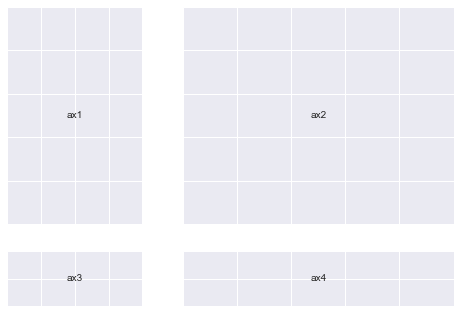

In [14]:
fig.clear()
ax1, ax2, ax3, ax4 = [fig.add_subplot(gs[0]),
                     fig.add_subplot(gs[1]),
                     fig.add_subplot(gs[2]),
                     fig.add_subplot(gs[3])]

annotate_axes(fig)
fig

Doing the same thing in a simpler way

In [15]:
def add_gs_to_fig(fig, gs): 
    "Adds all `SubplotSpec`s in `gs` to `fig`"
    for g in gs: fig.add_subplot(g)

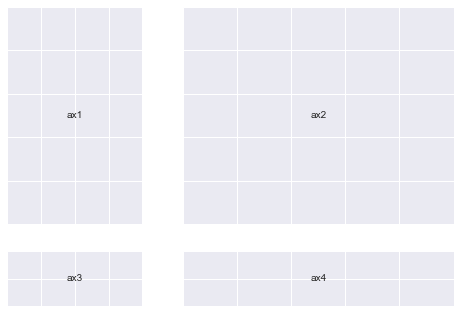

In [16]:
fig.clear()
add_gs_to_fig(fig, gs)
annotate_axes(fig)
fig

That means you can now do this:<br>
(Notice how the `Axes` sizes increase from top-left to bottom-right)

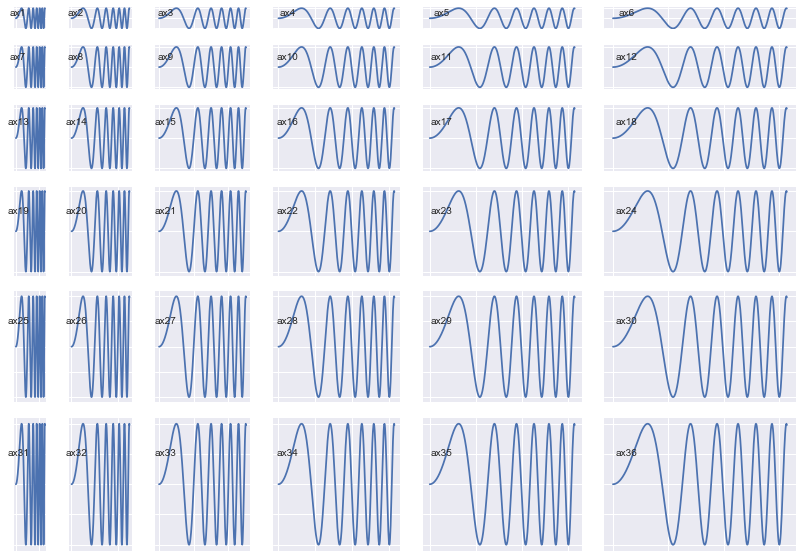

In [17]:
fig = plt.figure(figsize=(14,10))
length = 6
gs = plt.GridSpec(nrows=length, ncols=length, 
                  width_ratios=list(range(1, length+1)), height_ratios=list(range(1, length+1)))

add_gs_to_fig(fig, gs)
annotate_axes(fig)
for ax in fig.axes:
    ax.plot(xs, ys)
plt.show()

## A very unexpected observation: (which gives us yet more clarity, and Power)
Notice how after each print operation, different addresses get printed for each `gs` object.

In [18]:
gs[0], gs[1], gs[2], gs[3]

(<matplotlib.gridspec.SubplotSpec at 0x29b0e56d198>,
 <matplotlib.gridspec.SubplotSpec at 0x29b10f0c400>)

In [19]:
gs[0], gs[1], gs[2], gs[3]

(<matplotlib.gridspec.SubplotSpec at 0x29b10f0c128>,
 <matplotlib.gridspec.SubplotSpec at 0x29b10e6a668>)

In [20]:
print(gs[0,0], gs[0,1], gs[1, 0], gs[1, 1])

<matplotlib.gridspec.SubplotSpec object at 0x0000029B11782940> <matplotlib.gridspec.SubplotSpec object at 0x0000029B1280B7B8> <matplotlib.gridspec.SubplotSpec object at 0x0000029B1280B668> <matplotlib.gridspec.SubplotSpec object at 0x0000029B1280B160>


In [21]:
print(gs[0,0], gs[0,1], gs[1, 0], gs[1, 1])

<matplotlib.gridspec.SubplotSpec object at 0x0000029B1280B828> <matplotlib.gridspec.SubplotSpec object at 0x0000029B1280B550> <matplotlib.gridspec.SubplotSpec object at 0x0000029B1280BDA0> <matplotlib.gridspec.SubplotSpec object at 0x0000029B1280B048>


**Lets understand why this happens:**

*Notice how a group of `gs` objects indexed into at the same time also produces just one object instead of multiple objects*

In [22]:
gs[:,:], gs[:, 0]
# both output just one object each

(<matplotlib.gridspec.SubplotSpec at 0x29b1280b7b8>,
 <matplotlib.gridspec.SubplotSpec at 0x29b1280b668>)

In [23]:
# Lets try another `gs` object, this time a little more crowded
# I chose the ratios randomly
gs = mpl.gridspec.GridSpec(nrows=3, ncols=3, width_ratios=[1, 2, 1], height_ratios=[4, 1, 3])

*All these operations print just one object. What is going on here?*

In [24]:
print(gs[:,0])
print(gs[1:,:2])
print(gs[:,:])

Let's try and add subplots to our `Figure` to `see` what's going on.<br>
We'll do a few different permutations to get an exact idea.

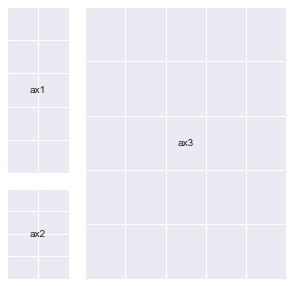

In [25]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[:, 1:])
annotate_axes(fig)

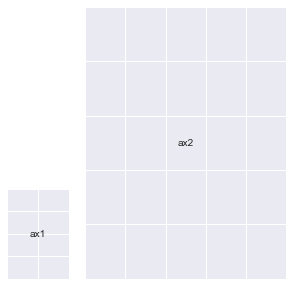

In [26]:
fig = plt.figure(figsize=(5,5))
# ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[:, 1:])
annotate_axes(fig)

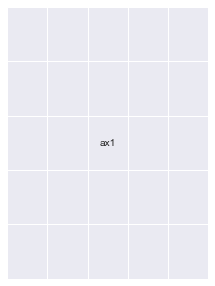

In [27]:
fig = plt.figure(figsize=(5,5))
# ax1 = fig.add_subplot(gs[:2, 0])
# ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[:, 1:])
annotate_axes(fig)

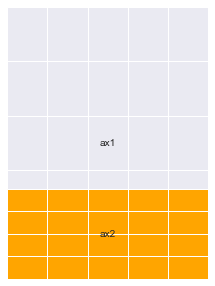

In [28]:
fig = plt.figure(figsize=(5,5))
# ax1 = fig.add_subplot(gs[:2, 0])
# ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[:, 1:])

# Notice the line below : You can overlay Axes using `GridSpec` too
ax4 = fig.add_subplot(gs[2:, 1:])
ax4.set_facecolor('orange')
annotate_axes(fig)

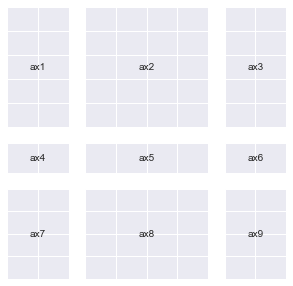

In [29]:
fig.clear()
add_gs_to_fig(fig, gs)
annotate_axes(fig)
fig

Here's a bullet point summary of what this means:
1. `gs` can be used as a sort of a `factory` for different kinds of `Axes`. 
2. You give this `factory` an order by indexing into particular areas of the `Grid`. It gives back a single `SubplotSpec` (check `type(gs[0]`) object that helps you create an `Axes` which has all of the area you indexed into combined into one unit.
3. Your `height` and `width` ratios for the indexed portion will determine the size of the `Axes` that gets generated.
4. `Axes` will maintain relative proportions according to your `height` and `width` ratios always.
5. For all these reasons, I like `GridSpec`!

This ability to create different grid variations that `GridSpec` provides is probably the reason for that anomaly we saw a while ago (printing different Addresses).

It creates new objects everytime you index into it because it will be very troublesome to store all permutations of `SubplotSpec` objects into one group in memory (try and count permutations for a `GridSpec` of 10x10 and you'll know why)

---
## Now let's finally create `plt.subplots(2,2)` once again using GridSpec

yayy


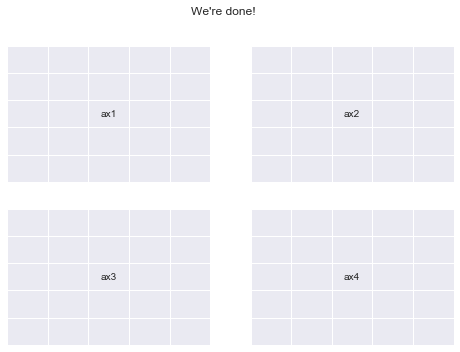

In [30]:
fig = plt.figure()
gs = mpl.gridspec.GridSpec(nrows=2, ncols=2)
add_gs_to_fig(fig, gs)
annotate_axes(fig)
fig.suptitle("We're done!")
print("yayy")

# What you should try:
---
Here's a few things I think you should go ahead and explore:
1. Multiple `GridSpec` objects for the Same Figure.
2. Deleting and adding `Axes` effectively and meaningfully.
3. All the methods available for `mpl.figure.Figure` and `mpl.axes.Axes` allowing us to manipulate their properties.
4. Kaggle Learn's Data vizualization course is a great place to learn effective plotting using Python
5. Armed with knowledge, you will be able to use other plotting libraries such as `seaborn`, `plotly`, `pandas` and `altair` with much more flexibility (you can pass an `Axes` object to all their plotting functions). I encourage you to explore these libraries too.

This is the first time I've written any technical guide for the internet, it may not be as clean as tutorials generally are. But, I'm open to all the constructive criticism that you may have for me (drop me an email on akashpalrecha@gmail.com!)